<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
# Fetching stock data for Tesla (TSLA)
stock_data = yf.download('TSLA', start='2021-01-01', end='2021-06-14')

[*********************100%%**********************]  1 of 1 completed


In [7]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500
...,...,...,...,...,...,...
2021-06-07,197.276672,203.333328,194.293335,201.710007,201.710007,67631100
2021-06-08,207.669998,207.696671,198.500000,201.196671,201.196671,78160200
2021-06-09,200.723328,203.929993,199.210007,199.593338,199.593338,49753800


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [8]:
# create a ticker object for Tesla(TSLA)
ticker = yf.Ticker("TSLA")

#EXtract historical stock data with period set to max
tesla_data = ticker.history(period="max")

#display the first few rows of the DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Get the HTML content of the response
html_data = response.text


In [14]:
# now parse the html_data to BeautifuiSoup
soup = BeautifulSoup(html_data,'html.parser')

Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

In [26]:
# Find the table containing Tesla Revenue
table=soup.find_all("tbody")[1]

In [27]:
table

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


In [28]:
# Extract data from the table and store it into lists
dates = []
revenues = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    dates.append(cols[0].get_text())
    revenues.append(cols[1].get_text())

In [29]:
# Remove any '$' or commas from revenue values and convert them to integers
revenues = [int(revenue.replace('$', '').replace(',', '')) if revenue.strip() else None for revenue in revenues]


In [30]:
# Rename the columns
# Create a dataframe
tesla_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the dataframe
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

In [31]:
print(tesla_revenue.head())
print(tesla_revenue.columns)


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0
Index(['Date', 'Revenue'], dtype='object')


Execute the following lines to remove an null or empty strings in the Revenue column.


In [32]:
# Remove null or empty strings from the "Revenue" column
tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])

# Reset the index after removing rows
tesla_revenue.reset_index(drop=True, inplace=True)

# Display the modified dataframe
print(tesla_revenue)


          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-09-30     46.0
52  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [34]:
import yfinance as yf

#creating the ticker object for GameStop with ticker symbol GME

gme_ticker = yf.Ticker("GME")

#display the ticker object
print(gme_ticker)

yfinance.Ticker object <GME>


Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [35]:
#extract the stock information and save it into a DataFrame
gme_data = gme_ticker.history(period='max')

print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693349   1.603295   1.691666   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683251   
2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2024-02-12 00:00:00-05:00  14.580000  15.220000  14.530000  14.730000   
2024-02-13 00:00:00-05:00  14.200000  14.400000  13.770000  14.170000   
2024-02-14 00:00:00-05:00  14.330000  14.430000  14.050000  14.410000   
2024-02-15 00:00:00-05:00  14.540000  14.750000  14.230000  14.510000   
2024-02-16 00:00:00-05:00  14.460000  14.530000  14.100000  14.120000   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [37]:
#reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

print(gme_data.head())

   index                      Date      Open      High       Low     Close  \
0      0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666   
1      1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251   
2      2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   
3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   
4      4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   

     Volume  Dividends  Stock Splits  
0  76216000        0.0           0.0  
1  11021600        0.0           0.0  
2   8389600        0.0           0.0  
3   7410400        0.0           0.0  
4   6892800        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [50]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

response = requests.get(url)

html_data = response.text


In [51]:
# parse the data in the beautifulsoup
soup = BeautifulSoup(html_data,'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [57]:
# finding the table containing GameStop revinue
table = soup.find_all('tbody')[1]

In [58]:
# Extract data from the table and store it into lists
dates = []
revenues = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    dates.append(cols[0].get_text())
    revenue = cols[1].get_text().replace('$', '').replace(',', '')  # Remove $ and comma
    revenues.append(revenue)


In [59]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
response = requests.get(url)

# Get the HTML content of the response
html_data = response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing GameStop revenue
table = soup.find_all("tbody")[1]

# Extract data from the table and store it into lists
dates = []
revenues = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    dates.append(cols[0].get_text())
    revenue = cols[1].get_text().replace('$', '').replace(',', '')  # Remove $ and comma
    revenues.append(revenue)

# Create a DataFrame
gme_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the DataFrame
print(gme_revenue)


          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


In [61]:
# Extract data from the table and store it into lists
dates = []
revenues = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2:  # Ensure there are two columns in the row
        dates.append(cols[0].get_text())
        revenue = cols[1].get_text().replace('$', '').replace(',', '')  # Remove $ and comma
        revenues.append(revenue)

In [62]:
# Create a DataFrame
gme_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the DataFrame
print(gme_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [63]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


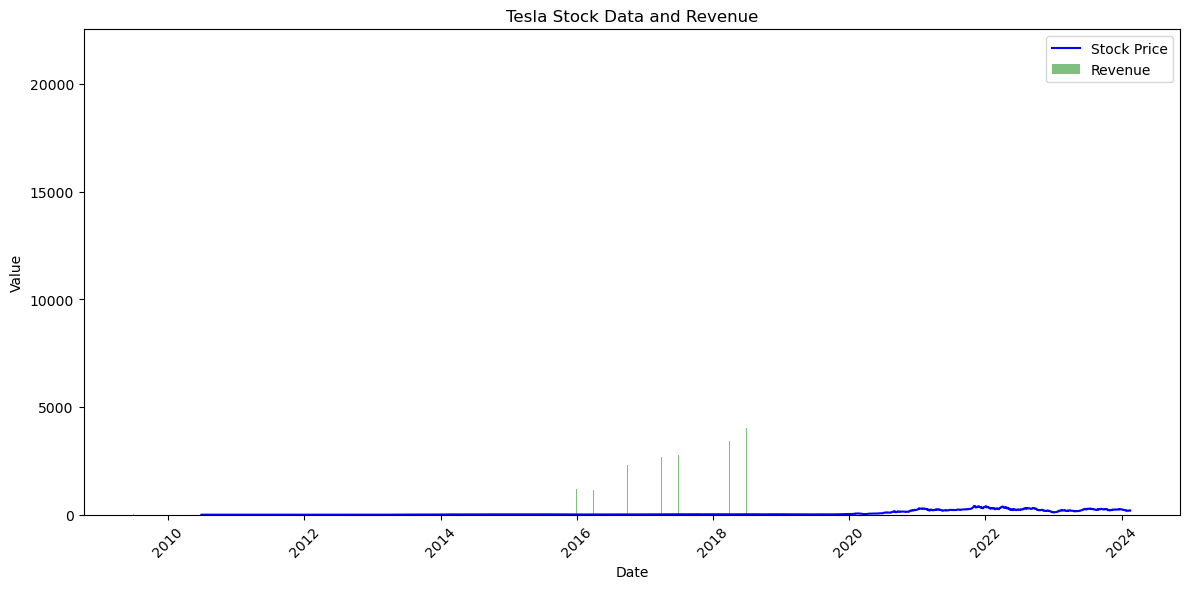

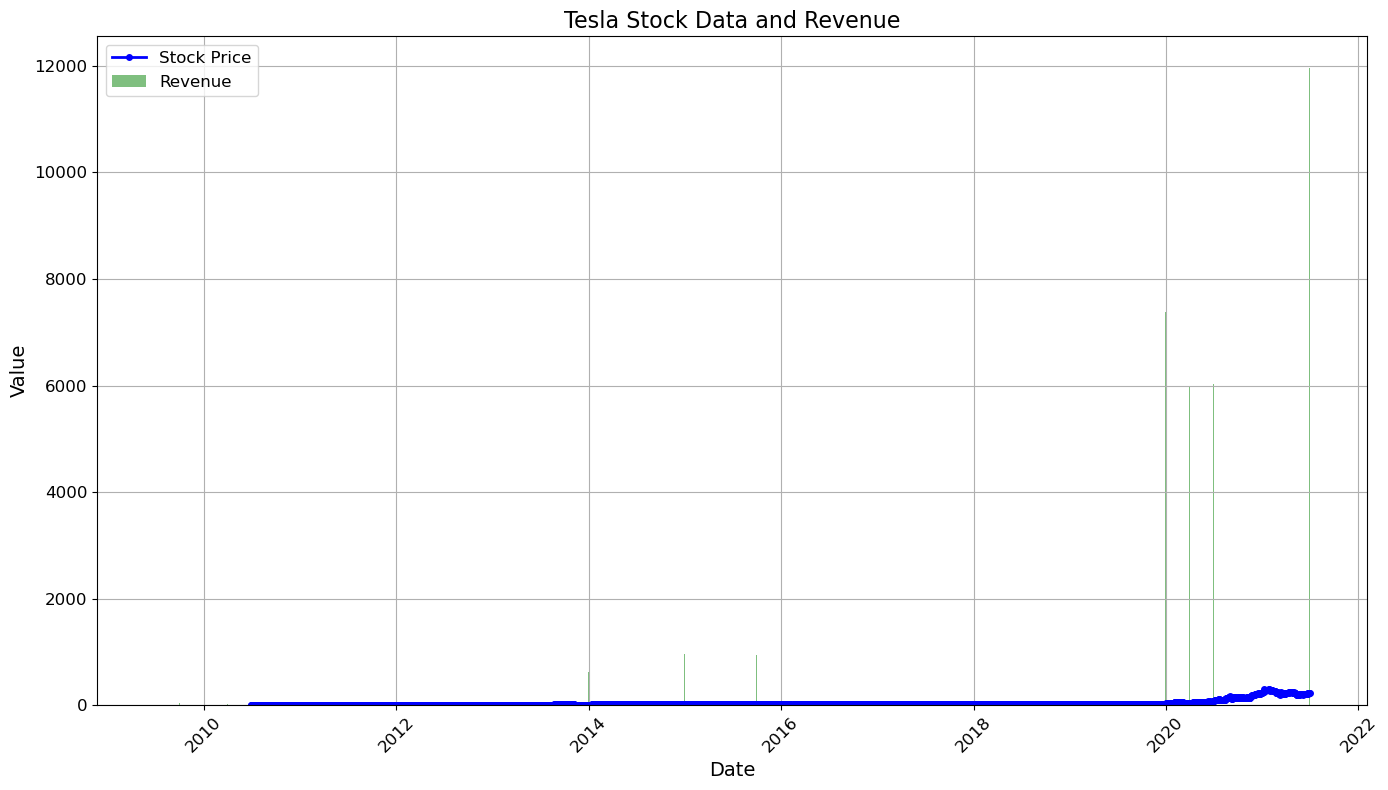

In [69]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(14, 8))  # Increase figure size for better clarity

    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue', linewidth=2, marker='o', markersize=4)

    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', alpha=0.5)

    # Title and labels
    plt.title(f'{stock_name} Stock Data and Revenue', fontsize=16)  # Increase font size for the title
    plt.xlabel('Date', fontsize=14)  # Increase font size for x-axis label
    plt.ylabel('Value', fontsize=14)  # Increase font size for y-axis label
    plt.xticks(rotation=45, fontsize=12)  # Increase font size and rotate x-axis ticks
    plt.yticks(fontsize=12)  # Increase font size for y-axis ticks
    plt.legend(fontsize=12)  # Increase font size for legend

    # Show grid for better readability
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

# Call make_graph function with data up to June 2021
make_graph(tesla_data[tesla_data['Date'] <= '2021-06-30'], tesla_revenue[tesla_revenue['Date'] <= '2021-06-30'], 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


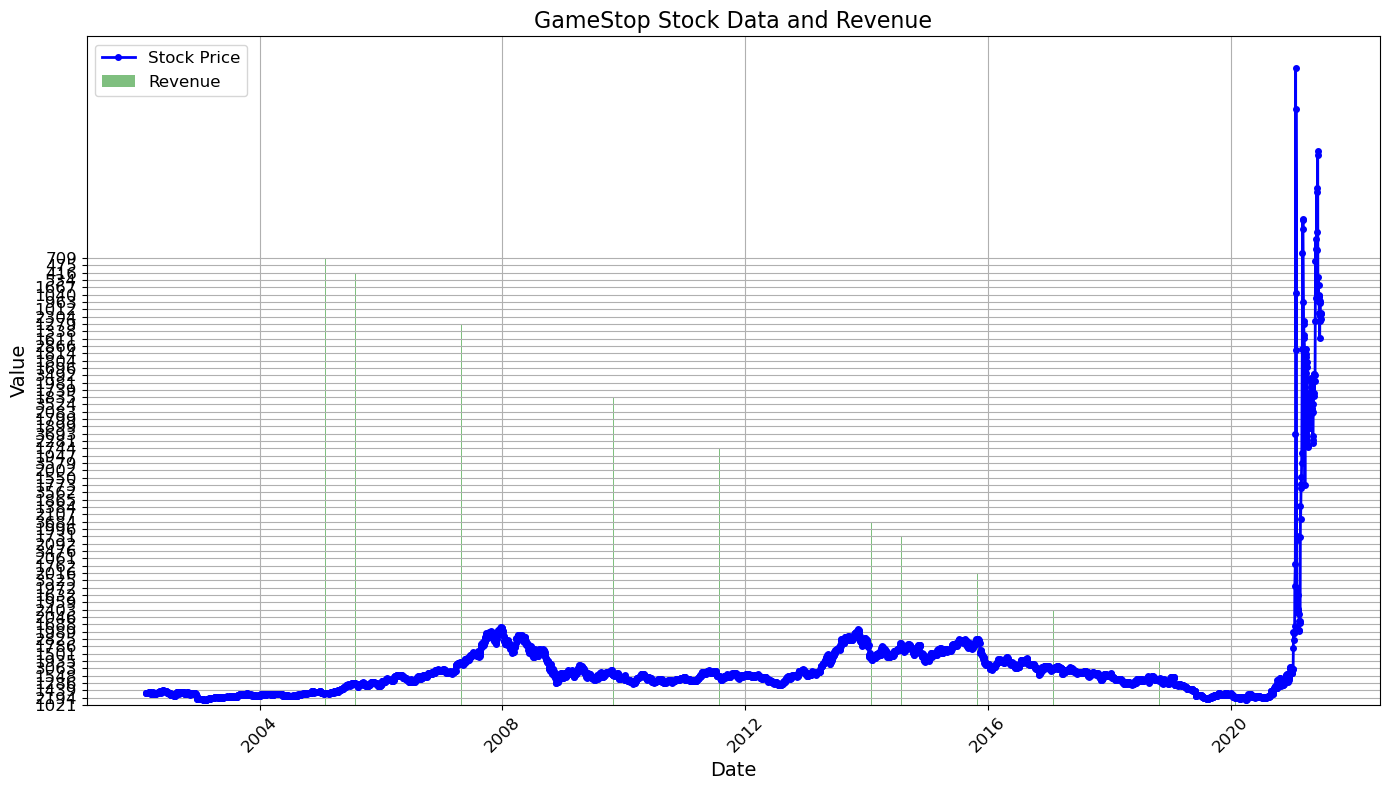

In [71]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(14, 8))  # Increase figure size for better clarity

    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue', linewidth=2, marker='o', markersize=4)

    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', alpha=0.5)

    # Title and labels
    plt.title(f'{stock_name} Stock Data and Revenue', fontsize=16)  # Increase font size for the title
    plt.xlabel('Date', fontsize=14)  # Increase font size for x-axis label
    plt.ylabel('Value', fontsize=14)  # Increase font size for y-axis label
    plt.xticks(rotation=45, fontsize=12)  # Increase font size and rotate x-axis ticks
    plt.yticks(fontsize=12)  # Increase font size for y-axis ticks
    plt.legend(fontsize=12)  # Increase font size for legend

    # Show grid for better readability
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

# Call make_graph function with data up to June 2021
make_graph(gme_data[gme_data['Date'] <= '2021-06-30'], gme_revenue[gme_revenue['Date'] <= '2021-06-30'], 'GameStop')
